In [1]:
import os, csv
import pixiedust # for debugging %%pixie_debugger

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

#feature extraction
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
import string
from nltk.tokenize.treebank import TreebankWordDetokenizer
nltk.download('punkt')
nltk.download('stopwords')

#vectorization
from gensim.models import Word2Vec


Pixiedust database opened successfully


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/josieldelgadillo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/josieldelgadillo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#get data
df = pd.read_csv("./data/barronsonline_tweets.csv")
df.head()

,Unnamed: 0,tweet_id,tweet_date,tweet_time,tweet_text,likes,retweets,parent_tweet_id,username,tweet_url
0,0,1360044606193295361,2021-02-12,01:54:37,"Hologic has gained 55% during the past year, b...",4,2,NaN,NaN,https://twitter.com/elonmusk/status/1360044606...
1,1,1360007215726403586,2021-02-11,23:26:02,Online travel agency Expedia had a far worse f...,1,1,NaN,NaN,https://twitter.com/elonmusk/status/1360007215...
2,2,1360002123212218369,2021-02-11,23:05:48,Payments company Affirm topped forecasts in it...,3,2,NaN,NaN,https://twitter.com/elonmusk/status/1360002123...
3,3,1359991942793289729,2021-02-11,22:25:21,CEO Zander Lurie says he thinks the company ha...,4,1,NaN,NaN,https://twitter.com/elonmusk/status/1359991942...
4,4,1359986836693737474,2021-02-11,22:05:03,"The Dow ended slightly in the red, but not bef...",2,1,NaN,NaN,https://twitter.com/elonmusk/status/1359986836...


In [3]:
# clean data from punctuation, alphabets, and english stop words
clean = []

for index, row in df.iterrows():
    tokens = nltk.word_tokenize(row.tweet_text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    reconstruct = TreebankWordDetokenizer().detokenize(tokens)
    new = reconstruct.translate(str.maketrans('', '', string.punctuation))
    stripped = nltk.word_tokenize(new)
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    
    reconstruct = TreebankWordDetokenizer().detokenize(words)
    reconstruct = reconstruct.replace("https", "")
    clean_tokens = nltk.word_tokenize(reconstruct)
    # assigning clean list to new attribute
    clean.append(clean_tokens)
df['Clean'] = clean
df.head()

,Unnamed: 0,tweet_id,tweet_date,tweet_time,tweet_text,likes,retweets,parent_tweet_id,username,tweet_url,Clean
0,0,1360044606193295361,2021-02-12,01:54:37,"Hologic has gained 55% during the past year, b...",4,2,NaN,NaN,https://twitter.com/elonmusk/status/1360044606...,"[hologic, gained, past, year, valuation, dropp..."
1,1,1360007215726403586,2021-02-11,23:26:02,Online travel agency Expedia had a far worse f...,1,1,NaN,NaN,https://twitter.com/elonmusk/status/1360007215...,"[online, travel, agency, expedia, far, worse, ..."
2,2,1360002123212218369,2021-02-11,23:05:48,Payments company Affirm topped forecasts in it...,3,2,NaN,NaN,https://twitter.com/elonmusk/status/1360002123...,"[payments, company, affirm, topped, forecasts,..."
3,3,1359991942793289729,2021-02-11,22:25:21,CEO Zander Lurie says he thinks the company ha...,4,1,NaN,NaN,https://twitter.com/elonmusk/status/1359991942...,"[ceo, zander, lurie, says, thinks, company, co..."
4,4,1359986836693737474,2021-02-11,22:05:03,"The Dow ended slightly in the red, but not bef...",2,1,NaN,NaN,https://twitter.com/elonmusk/status/1359986836...,"[dow, ended, slightly, red, setting, intraday,..."


In [4]:
#Word2Vec implemntation
model = Word2Vec(df['Clean'],
                min_count=10,
                workers=4,
                size=50,
                window=5,
                iter=10).wv

#vocab size
print(len(model.vocab.keys()))
print (list(model.vocab))

model.save("./data/modelW2V")

861
['gained', 'past', 'year', 'valuation', 'dropped', 'worth', 'look', 'online', 'travel', 'far', 'fourth', 'quarter', 'analysts', 'payments', 'company', 'forecasts', 'first', 'quarterly', 'report', 'public', 'guidance', 'may', 'ceo', 'says', 'thinks', 'set', 'changes', 'growth', 'dow', 'ended', 'red', 'high', 'initial', 'jobless', 'claims', 'could', 'much', 'billion', 'range', 'central', 'banks', 'maker', 'announced', 'deal', 'berkshire', 'hathaway', 'sell', 'electric', 'yield', 'levels', 'health', 'began', 'trading', 'thursday', 'jumped', 'forecast', 'number', 'learn', 'pandemic', 'auto', 'industry', 'us', 'two', 'well', 'new', 'york', 'show', 'might', 'home', 'executives', 'although', 'john', 'took', 'continued', 'amid', 'record', 'quickly', 'developed', 'early', 'january', 'event', 'international', 'due', 'made', 'surge', 'interest', 'among', 'news', 'tesla', 'price', 'citi', 'sees', 'coming', 'several', 'raised', 'targets', 'group', 'stock', 'week', 'response', 'sales', 'expected

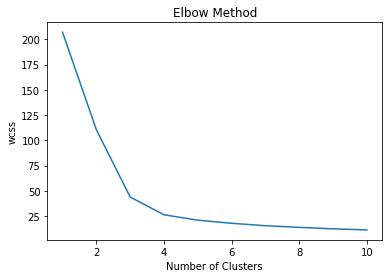

In [5]:
# Elbow method for finding the optimal value of k or the number of clusters
wcss = []
for i in range(1, 11):
    k = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    k.fit(model.vectors.astype('double'))
    wcss.append(k.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=50, max_iter=1000, random_state=True)

In [12]:
y_kmeans = kmeans.fit_predict(model.vectors.astype('double'))

In [13]:
model.similar_by_vector(kmeans.cluster_centers_[0], topn=10, restrict_vocab=None)

[('comes', 0.9997888207435608),
 ('sector', 0.9997806549072266),
 ('index', 0.9997562170028687),
 ('including', 0.9997296333312988),
 ('high', 0.9997294545173645),
 ('power', 0.9997286796569824),
 ('number', 0.9997251033782959),
 ('less', 0.9997173547744751),
 ('production', 0.9997162818908691),
 ('current', 0.999714195728302)]

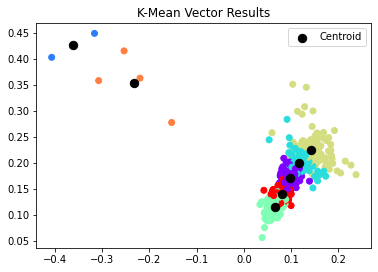

In [14]:
#plot data
data = model.vectors # x values
labels = kmeans.labels_ # color list count

# general data points
plt.subplots_adjust(bottom = 0.1)
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow') 
plt.title("K-Mean Vector Results")

#cluster centers
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c='black', label='Centroid')
plt.legend()

In [10]:
# label and assign each word a sentiment score using inverse of closeness score
senti = pd.DataFrame(model.vocab.keys())
senti.columns = ['words']
senti['vectors'] = senti.words.apply(lambda x: model.wv[f'{x}'])
senti['cluster'] = senti.vectors.apply(lambda x: kmeans.predict([np.array(x)]))
senti['cluster'] = senti.cluster.apply(lambda x: x[0])
senti['cluster_value'] = [1 if i==0 else -1 for i in senti.cluster]
senti['closeness_score'] = senti.apply(lambda x: 1/(kmeans.transform([x.vectors]).min()), axis=1)
senti['sentiment_coeff'] = senti.closeness_score * senti.cluster_value
print(senti[['words','cluster','cluster_value', 'closeness_score' ,'sentiment_coeff']])

<ipython-input-10-30b9b699ffbb>:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  senti['vectors'] = senti.words.apply(lambda x: model.wv[f'{x}'])


         words  cluster  cluster_value  closeness_score  sentiment_coeff
0       gained        1             -1        22.558432       -22.558432
1         past        0              1         9.712192         9.712192
2         year        0              1         5.145889         5.145889
3    valuation        1             -1         3.789759        -3.789759
4      dropped        1             -1        12.965189       -12.965189
..         ...      ...            ...              ...              ...
856     direct        1             -1         4.563668        -4.563668
857   doordash        1             -1         9.685709        -9.685709
858         ge        1             -1         5.449880        -5.449880
859      women        1             -1         3.768831        -3.768831
860  lockdowns        1             -1         7.054590        -7.054590

[861 rows x 5 columns]
